In [1]:
from autogluon.tabular import TabularDataset, TabularPredictor

# import pandas
import pandas as pd

# import train-test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer


# Previsão do ranking

In [2]:
data = pd.read_csv("../data/df_pooled_ranking.csv")
data.head()


,nome,ida,diff_fase,ponto_virada_encoded,anos_pm,bolsista_encoded,ipv,corraca,ponto_virada,ian,...,idade,sexo_encoded,fase,inde,sexo,na_fase,ano,cg,cf,ct
0,ALUNO-2,8.816667,-2.0,0,0.0,0,7.916665,B,Não,5.0,...,11.0,1.0,0,7.675509,F,0,2022,245.0,66.0,6.0
1,ALUNO-4,0.000000,-1.0,0,2.0,0,7.750000,R,Não,5.0,...,10.0,0.0,1,5.076252,M,0,2020,451.0,69.0,3.0
2,ALUNO-4,5.083333,-1.0,0,0.0,0,8.055553,R,Não,5.0,...,12.0,0.0,2,7.117065,M,0,2022,451.0,69.0,3.0
3,ALUNO-5,7.500000,0.0,0,1.0,0,8.166665,R,Não,10.0,...,10.0,0.0,2,8.077085,M,1,2020,415.0,61.0,12.0
4,ALUNO-5,5.400000,0.0,0,2.0,0,7.400000,R,Não,10.0,...,11.0,0.0,2,7.399000,M,1,2021,415.0,61.0,12.0


In [3]:
data.columns


Index(['nome', 'ida', 'diff_fase', 'ponto_virada_encoded', 'anos_pm',
       'bolsista_encoded', 'ipv', 'corraca', 'ponto_virada', 'ian', 'pedra',
       'pedra_encoded', 'iaa', 'ips', 'ieg', 'ipp', 'idade', 'sexo_encoded',
       'fase', 'inde', 'sexo', 'na_fase', 'ano', 'cg', 'cf', 'ct'],
      dtype='object')

In [4]:
data.drop(
    columns=[
        "sexo_encoded",
        "cf",
        "ct",
        "pedra_encoded",
        "ponto_virada_encoded",
        "nome",
        "corraca",
    ],
    inplace=True,
)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1646 entries, 0 to 1645
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ida               1646 non-null   float64
 1   diff_fase         1646 non-null   float64
 2   anos_pm           1646 non-null   float64
 3   bolsista_encoded  1646 non-null   int64  
 4   ipv               1646 non-null   float64
 5   ponto_virada      1646 non-null   object 
 6   ian               1646 non-null   float64
 7   pedra             1646 non-null   object 
 8   iaa               1646 non-null   float64
 9   ips               1646 non-null   float64
 10  ieg               1646 non-null   float64
 11  ipp               1646 non-null   float64
 12  idade             1646 non-null   float64
 13  fase              1646 non-null   int64  
 14  inde              1646 non-null   float64
 15  sexo              1646 non-null   object 
 16  na_fase           1646 non-null   int64  


In [15]:
kbins = KBinsDiscretizer(n_bins=10, encode="ordinal", strategy="quantile")
# binned = kbins.fit_transform(data[['cg']])
data["cg_cat"] = kbins.fit_transform(data[["cg"]])
data["cg_cat"] = data["cg_cat"].astype("category")


In [16]:
# converts 'idade' to int
data["idade"] = data["idade"].astype(int)

# converts 'ian' to category
data["ian"] = data["ian"].astype("category")

# converts 'sexo' to category
data["sexo"] = data["sexo"].astype("category")

# converts 'pedra' to category
data["pedra"] = data["pedra"].astype("category")

# converts 'ponto_virada' to category
data["ponto_virada"] = data["ponto_virada"].astype("category")

# converts 'fase' to category
data["fase"] = data["fase"].astype("category")

# converts 'na_fase' to boolean
data["na_fase"] = data["na_fase"].astype(bool)

# converts bolsista_encoded to boolean
data["bolsista_encoded"] = data["bolsista_encoded"].astype(bool)

# maps ano to t,t+1,t+2
data["ano"] = data["ano"].apply(
    lambda x: "t0" if x == 2020 else ("t1" if x == 2021 else "t2")
)
data["ano"] = data["ano"].astype("category")

data.head()


,ida,diff_fase,anos_pm,bolsista_encoded,ipv,ponto_virada,ian,pedra,iaa,ips,ieg,ipp,idade,fase,inde,sexo,na_fase,ano,cg,cg_cat
0,8.816667,-2.0,0.0,False,7.916665,Não,5.0,Ametista,10.00002,7.500,7.581705,5.6250,11,0,7.675509,F,False,t2,245.0,2.0
1,0.000000,-1.0,2.0,False,7.750000,Não,5.0,Quartzo,8.00002,6.875,4.100000,7.1875,10,1,5.076252,M,False,t2,451.0,5.0
2,5.083333,-1.0,0.0,False,8.055553,Não,5.0,Ametista,10.00002,7.500,8.071429,6.2500,12,2,7.117065,M,False,t2,451.0,5.0
3,7.500000,0.0,1.0,False,8.166665,Não,10.0,Ametista,7.50002,7.500,8.000000,8.4375,10,2,8.077085,M,True,t2,415.0,4.0
4,5.400000,0.0,2.0,False,7.400000,Não,10.0,Ametista,7.40000,7.500,7.500000,8.5000,11,2,7.399000,M,True,t2,415.0,4.0


In [17]:
data["cg_cat"].value_counts()


cg_cat
8.0    166
0.0    165
9.0    165
2.0    165
6.0    165
4.0    165
1.0    164
3.0    164
5.0    164
7.0    163
Name: count, dtype: int64

In [18]:
# Selecionar as variáveis preditoras e a variável alvo
X = data.drop(columns=["cg", "cg_cat"])

# X = X[
#     [
#         "inde",
#         "ano",
#         "pedra",
#         "idade",
#         "fase",
#         "ipv",
#         "diff_fase",
#         "ipp",
#         "ieg",
#         "ian",
#         "ponto_virada",
#         "ida",
#         "ips",
#         "na_fase",
#         "iaa",
#     ]
# ]

X = X[
    [
        "inde",
        "ano",
        "ipv",
        "pedra",
        "na_fase",
        "ida",
        "ipp",
        "idade",
        "iaa",
        "fase",
        "ieg",
    ]
]


X_train, X_test, y_train, y_test = train_test_split(
    X, data["cg_cat"], test_size=0.25, random_state=41, shuffle=True
)


In [19]:
X_train.head()


,inde,ano,ipv,pedra,na_fase,ida,ipp,idade,iaa,fase,ieg
425,6.764000,t2,7.300000,Ágata,True,4.200000,7.700000,9,9.50000,1,5.000000
1238,8.114724,t2,7.944447,Ametista,False,8.333333,8.125000,14,9.16668,3,9.400000
266,7.765000,t2,8.400000,Ametista,False,7.100000,8.100000,10,8.50000,1,8.800000
1058,7.680084,t2,7.666663,Ametista,False,8.500000,6.458333,13,8.00002,2,8.754579
1147,6.389726,t2,8.166665,Ágata,False,3.333333,5.625000,11,9.50002,1,6.948622


In [20]:
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)


In [21]:
train_data.head()


,inde,ano,ipv,pedra,na_fase,ida,ipp,idade,iaa,fase,ieg,cg_cat
425,6.764000,t2,7.300000,Ágata,True,4.200000,7.700000,9,9.50000,1,5.000000,8.0
1238,8.114724,t2,7.944447,Ametista,False,8.333333,8.125000,14,9.16668,3,9.400000,3.0
266,7.765000,t2,8.400000,Ametista,False,7.100000,8.100000,10,8.50000,1,8.800000,0.0
1058,7.680084,t2,7.666663,Ametista,False,8.500000,6.458333,13,8.00002,2,8.754579,2.0
1147,6.389726,t2,8.166665,Ágata,False,3.333333,5.625000,11,9.50002,1,6.948622,7.0


In [22]:
label = "cg_cat"
print("Summary of class variable: \n", train_data[label].describe())


Summary of class variable: 
 count     1234.0
unique      10.0
top          1.0
freq       130.0
Name: cg_cat, dtype: float64


In [23]:
train_data.dtypes


inde        float64
ano        category
ipv         float64
pedra      category
na_fase        bool
ida         float64
ipp         float64
idade         int64
iaa         float64
fase       category
ieg         float64
cg_cat     category
dtype: object

In [24]:
time_limit = 1200  # for quick demonstration only, you should set this to longest time you are willing to wait (in seconds)

save_path = "agModels-predictRanking_mq"  # specifies folder to store trained models
predictor = TabularPredictor(
    label=label, path=save_path, problem_type="multiclass"
).fit(train_data, presets="medium_quality", num_gpus=1, time_limit=time_limit)


Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.11.9
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Mar 29 23:14:13 UTC 2024
CPU Count:          16
Memory Avail:       12.85 GB / 15.49 GB (83.0%)
Disk Space Avail:   914.07 GB / 1006.85 GB (90.8%)
Presets specified: ['medium_quality']
Beginning AutoGluon training ... Time limit = 1200s
AutoGluon will save models to "agModels-predictRanking_mq"
Train Data Rows:    1234
Train Data Columns: 11
Label Column:       cg_cat
Problem Type:       multiclass
Preprocessing data ...
Train Data Class Count: 10
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    13162.98 MB
	Train Data (Original)  Memory Usage: 0.07 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify speci

In [25]:
y_test = test_data[label]  # values to predict
test_data_nolab = X_test  # delete label column to prove we're not cheating
test_data_nolab.head()


,inde,ano,ipv,pedra,na_fase,ida,ipp,idade,iaa,fase,ieg
983,7.549000,t2,9.200000,Ametista,False,7.600000,7.900000,11,9.00000,2,7.50
1469,7.006000,t2,6.600000,Ametista,True,4.400000,6.600000,8,7.40000,0,8.30
721,8.881000,t2,8.900000,Topázio,True,7.800000,8.800000,9,10.00000,1,9.60
713,6.519446,t2,8.055553,Ágata,False,6.000000,5.208333,15,9.00002,1,8.00
85,6.684723,t2,7.416667,Ágata,False,6.111111,7.500000,15,7.91667,4,6.25


In [26]:
predictor = TabularPredictor.load(
    save_path
)  # unnecessary, just demonstrates how to load previously-trained predictor from file

y_pred = predictor.predict(test_data_nolab)
print("Predictions:  \n", y_pred)
perf = predictor.evaluate_predictions(
    y_true=y_test, y_pred=y_pred, auxiliary_metrics=True
)


Predictions:  
 983     3.0
1469    5.0
721     0.0
713     7.0
85      6.0
       ... 
540     8.0
333     0.0
1424    6.0
1065    3.0
879     3.0
Name: cg_cat, Length: 412, dtype: float64


In [27]:
perf


{'accuracy': 0.6262135922330098,
 'balanced_accuracy': 0.6288930507048196,
 'mcc': 0.586889787799712}

In [28]:
predictor.leaderboard(test_data, silent=True)


,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,CatBoost,0.626214,0.611336,accuracy,0.007536,0.004603,3.566948,0.007536,0.004603,3.566948,1,True,8
1,WeightedEnsemble_L2,0.626214,0.611336,accuracy,0.010417,0.005571,3.733030,0.002881,0.000969,0.166082,2,True,14
2,LightGBM,0.609223,0.603239,accuracy,0.007715,0.003996,2.176228,0.007715,0.003996,2.176228,1,True,5
3,RandomForestGini,0.589806,0.554656,accuracy,0.202588,0.173537,0.902762,0.202588,0.173537,0.902762,1,True,6
4,XGBoost,0.587379,0.607287,accuracy,0.064692,0.010040,16.035740,0.064692,0.010040,16.035740,1,True,11
5,RandomForestEntr,0.582524,0.558704,accuracy,0.211829,0.168210,1.464940,0.211829,0.168210,1.464940,1,True,7
6,LightGBMLarge,0.570388,0.562753,accuracy,0.016189,0.004478,4.266888,0.016189,0.004478,4.266888,1,True,13
7,LightGBMXT,0.548544,0.497976,accuracy,0.026978,0.010102,2.366695,0.026978,0.010102,2.366695,1,True,4
8,ExtraTreesGini,0.521845,0.461538,accuracy,0.217209,0.164907,1.475955,0.217209,0.164907,1.475955,1,True,9
9,ExtraTreesEntr,0.521845,0.481781,accuracy,0.233506,0.176758,1.547053,0.233506,0.176758,1.547053,1,True,10


In [29]:
results = predictor.fit_summary(show_plot=True)


*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0              CatBoost   0.611336    accuracy       0.004603   3.566948                0.004603           3.566948            1       True          8
1   WeightedEnsemble_L2   0.611336    accuracy       0.005571   3.733030                0.000969           0.166082            2       True         14
2               XGBoost   0.607287    accuracy       0.010040  16.035740                0.010040          16.035740            1       True         11
3              LightGBM   0.603239    accuracy       0.003996   2.176228                0.003996           2.176228            1       True          5
4         LightGBMLarge   0.562753    accuracy       0.004478   4.266888                0.004478           4.266888            1       True         13
5      RandomForestEntr   0.5587

gio: file:///home/alien-wsl/projects/datathon_app/datathonapp/notebooks/agModels-predictRanking_mqSummaryOfModels.html: Failed to find default application for content type ‘text/html’


In [29]:
print("AutoGluon infers problem type is: ", predictor.problem_type)
print("AutoGluon identified the following types of features:")
print(predictor.feature_metadata)


AutoGluon infers problem type is:  multiclass
AutoGluon identified the following types of features:
('category', [])  : 4 | ['ano', 'pedra', 'fase', 'ian']
('float', [])     : 8 | ['inde', 'ipv', 'diff_fase', 'ipp', 'ieg', ...]
('int', [])       : 1 | ['idade']
('int', ['bool']) : 2 | ['ponto_virada', 'na_fase']


In [30]:
predictor.feature_importance(test_data)


These features in provided data are not utilized by the predictor and will be ignored: ['ano']
Computing feature importance via permutation shuffling for 10 features using 412 rows with 5 shuffle sets...
	0.8s	= Expected runtime (0.16s per shuffle set)
	0.16s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
inde,0.526699,0.010298,1.752532e-08,5,0.547902,0.505496
iaa,0.004369,0.004974,6.050196e-02,5,0.014611,-0.005873
ieg,0.000485,0.002031,3.106541e-01,5,0.004667,-0.003696
ipv,0.000000,0.000000,5.000000e-01,5,0.000000,0.000000
pedra,0.000000,0.000000,5.000000e-01,5,0.000000,0.000000
na_fase,0.000000,0.000000,5.000000e-01,5,0.000000,0.000000
fase,0.000000,0.000000,5.000000e-01,5,0.000000,0.000000
ida,0.000000,0.000000,5.000000e-01,5,0.000000,0.000000
idade,-0.000485,0.001085,8.130495e-01,5,0.001750,-0.002720
ipp,-0.004369,0.001085,9.995781e-01,5,-0.002134,-0.006604


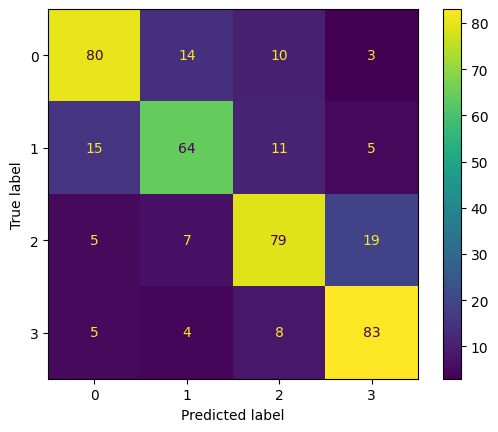

In [31]:
import matplotlib.pyplot as plt
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)

cm_display.plot()
plt.show()


In [32]:
features_importance = predictor.feature_importance(test_data)


Computing feature importance via permutation shuffling for 15 features using 412 rows with 5 shuffle sets...
	92.09s	= Expected runtime (18.42s per shuffle set)
	9.52s	= Actual runtime (Completed 5 of 5 shuffle sets)


In [33]:
features_importance[features_importance["importance"] > 0].index.to_list()


['inde',
 'ano',
 'ipv',
 'pedra',
 'na_fase',
 'ida',
 'ipp',
 'idade',
 'iaa',
 'fase',
 'ieg']